
### Assignment using the Pagila database:
### Note: The payment table is partitioned  - you may need to research what this means ### and how to work with it!

1. SQL (Write SQL queries to accomplish this.  When I say 'display' I mean write a select query.)
- Display the first and last name of each actor in a single column in upper case letters.  Name that column "Actor Name"
- Find all actors whose last name contains the letters "LI"
- List the last names of actors, as well as the amount of actors who have that last name
- Display the first name, last name, full address, and total payment amount collected in 2005 for each staff member.
- Display all actors who appear in the film Alone Trip
- What customer had the highest amount of rentals in 2005?
- What store had the highest number of rentals for family movies?

2. Python (Use a combination of queries using psycopg2 and pandas code to answer the following)
- Create a graphic to display the top 20 rented films.  Then do the same for the bottom 20
- Create a graphic that compares the amount of sales each store has brought in.
- Create a python function that will display a graphic the showcases the top N genres by gross revenue.
- Create a graphic showing the average replacement cost by category
- Create a pie chart showing the percentage of films in each rating category (G, PG, PG-13, etc.)
- For each category, on average how many rentals of a film need to occur to cover the replacement cost?

3. Analysis
- The owner of these rental stores is working on making an infographic to share with investors that will showcase how each store is doing financially.  She wants you to create at least 4 graphics that she can include in her presentation that will be relevant to her.  These graphics should be designed to provide a clear, concise, and visually appealing overview of how the stores are doing.

# SQL

In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Display the first and last name of each actor in a single column in upper case letters.  Name that column "Actor Name"

# SELECT UPPER(first_name) || ' ' || UPPER(last_name) AS Actor_Name 
# FROM actor;

In [3]:
# Find all actors whose last name contains the letters "LI"

# SELECT first_name, last_name FROM actor
# WHERE UPPER(last_name) LIKE '%LI%';

In [4]:
# List the last names of actors, as well as the amount of actors who have that last name

# SELECT last_name, COUNT(*) as total FROM actor
# GROUP BY last_name
# ORDER BY last_name;


In [5]:
# Display the first name, last name, full address, and total payment amount collected in 2005 for each staff member.

# SELECT first_name, last_name, address, SUM(amount) AS amount FROM staff
# INNER JOIN payment ON staff.staff_id = payment.staff_id
# INNER JOIN address on staff.address_id = address.address_id
# WHERE payment.payment_date >= '2022-01-01' AND payment.payment_date < '2023-01-01'
# GROUP BY first_name, last_name, address;

In [6]:
# Display all actors who appear in the film Alone Trip

# SELECT first_name, last_name FROM actor
# INNER JOIN film_actor ON actor.actor_id = film_actor.actor_id
# INNER JOIN film ON film_actor.film_id = film.film_id
# WHERE film.title = UPPER('Alone Trip')
# GROUP BY first_name, last_name;

In [7]:
# What customer had the highest amount of rentals in 2005?

# SELECT first_name, last_name, COUNT(*) AS Total_Rentals FROM customer
# INNER JOIN rental ON customer.customer_id = rental.customer_id
# GROUP BY first_name, last_name
# ORDER BY Total_Rentals DESC
# LIMIT 1;

# Anwser: Eleanor Hunt

In [8]:
# What store had the highest number of rentals for family movies?

# SELECT store.store_id, COUNT(*) AS Total_Rentals FROM store
# INNER JOIN inventory ON store.store_id = inventory.store_id
# INNER JOIN film_category ON inventory.film_id = film_category.film_id
# INNER JOIN rental ON inventory.film_id = rental.rental_id
# INNER JOIN category ON film_category.category_id = category.category_id
# WHERE category.name = 'Family'
# GROUP BY store.store_id
# ORDER BY Total_Rentals DESC
# LIMIT 1;

# Answer: store_id = 1 / store 1


# Python

In [9]:
conn = psycopg2.connect(dbname = "postgres",
                  user = "postgres",
                  password = "password",
                  host = "localhost",
                  port = "5432")

In [10]:
cursor = conn.cursor()

Text(0, 0.5, 'total rentals')

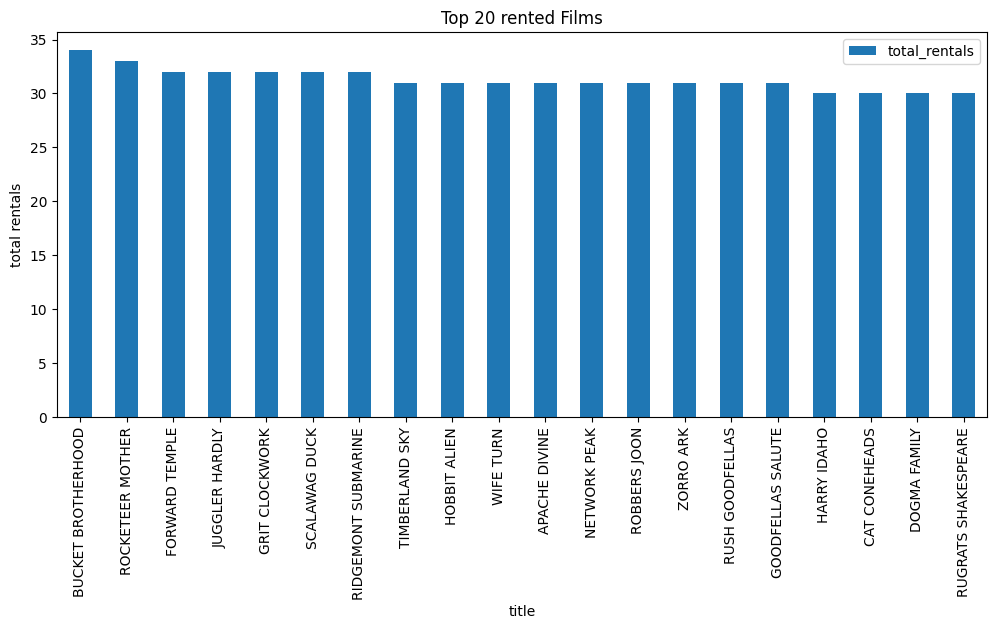

In [11]:
# Create a graphic to display the top 20 rented films.  Then do the same for the bottom 20

cursor.execute("SELECT title, COUNT(*) AS total_rentals FROM film INNER JOIN inventory ON film.film_id = inventory.film_id INNER JOIN rental on inventory.inventory_id = rental.inventory_id GROUP BY title ORDER BY total_rentals DESC;")
rows = cursor.fetchall()

film_rentals = pd.DataFrame(rows)
film_rentals.columns = ["title", "total_rentals"]
film_rentals["total_rentals"] = pd.to_numeric(film_rentals["total_rentals"])

top_20_rentals = film_rentals.head(20)


top_20_rentals.plot.bar(x="title", y="total_rentals", figsize=(12,5))
plt.title("Top 20 rented Films")
plt.xlabel("title")
plt.ylabel("total rentals")

Text(0, 0.5, 'total rentals')

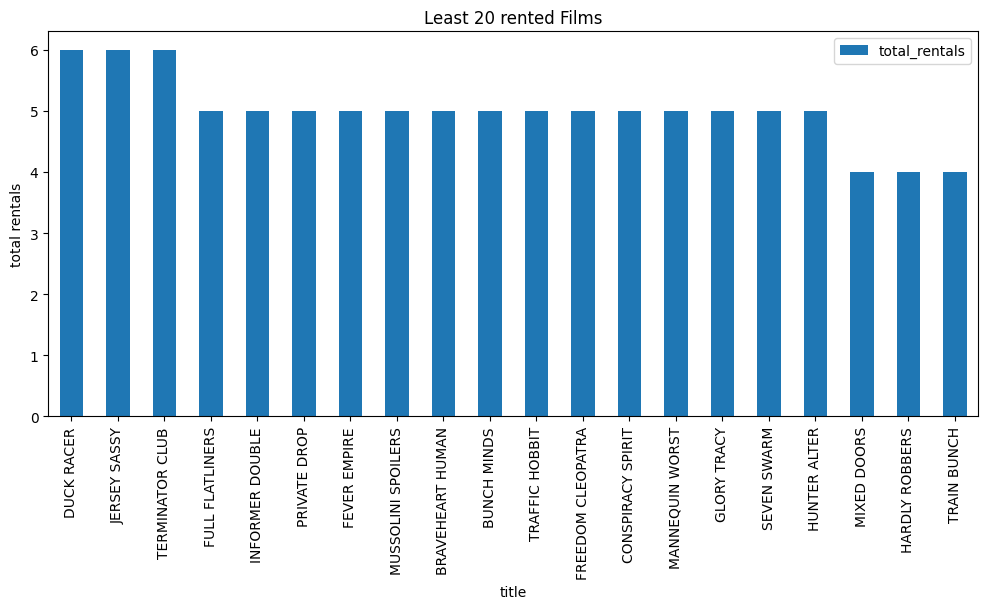

In [12]:
least_20_rentals = film_rentals.tail(20)
least_20_rentals.plot.bar(x="title", y="total_rentals", figsize=(12,5))
plt.title("Least 20 rented Films")
plt.xlabel("title")
plt.ylabel("total rentals")

,store,total_sales
0,2,9680.89
1,1,9476.34


Text(0.5, 1.0, 'Total Sales by Stores')

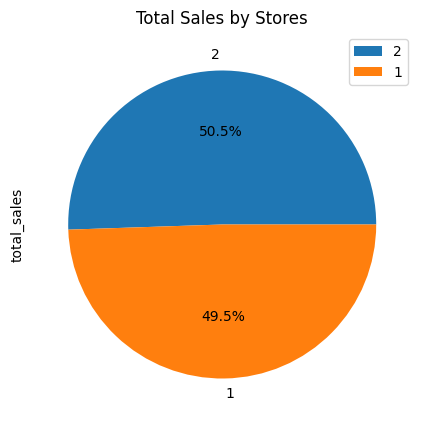

In [13]:
# Create a graphic that compares the amount of sales each store has brought in.

cursor.execute("SELECT store.store_id, SUM(payment.amount) AS total_sales FROM store INNER JOIN inventory ON store.store_id = inventory.store_id INNER JOIN rental ON inventory.film_id = rental.rental_id INNER JOIN payment ON rental.rental_id = payment.rental_id GROUP BY store.store_id;")
rows = cursor.fetchall()

store_sales = pd.DataFrame(rows)
store_sales.columns = ["store", "total_sales"]
store_sales["total_sales"] = pd.to_numeric(store_sales["total_sales"])

display(store_sales)

store_sales.plot.pie(y="total_sales", labels=store_sales["store"], autopct='%1.1f%%', figsize=(12, 5))
plt.title("Total Sales by Stores")


,genre,gross revenue
0,Sports,5314.21
1,Sci-Fi,4756.98
2,Animation,4656.30
3,Drama,4587.39
4,Comedy,4383.58
5,Action,4375.85
6,New,4361.57
7,Games,4281.33
8,Foreign,4270.67
9,Family,4226.07


<Axes: title={'center': 'Top 5 Genres by Gross Revenue'}, ylabel='gross revenue'>

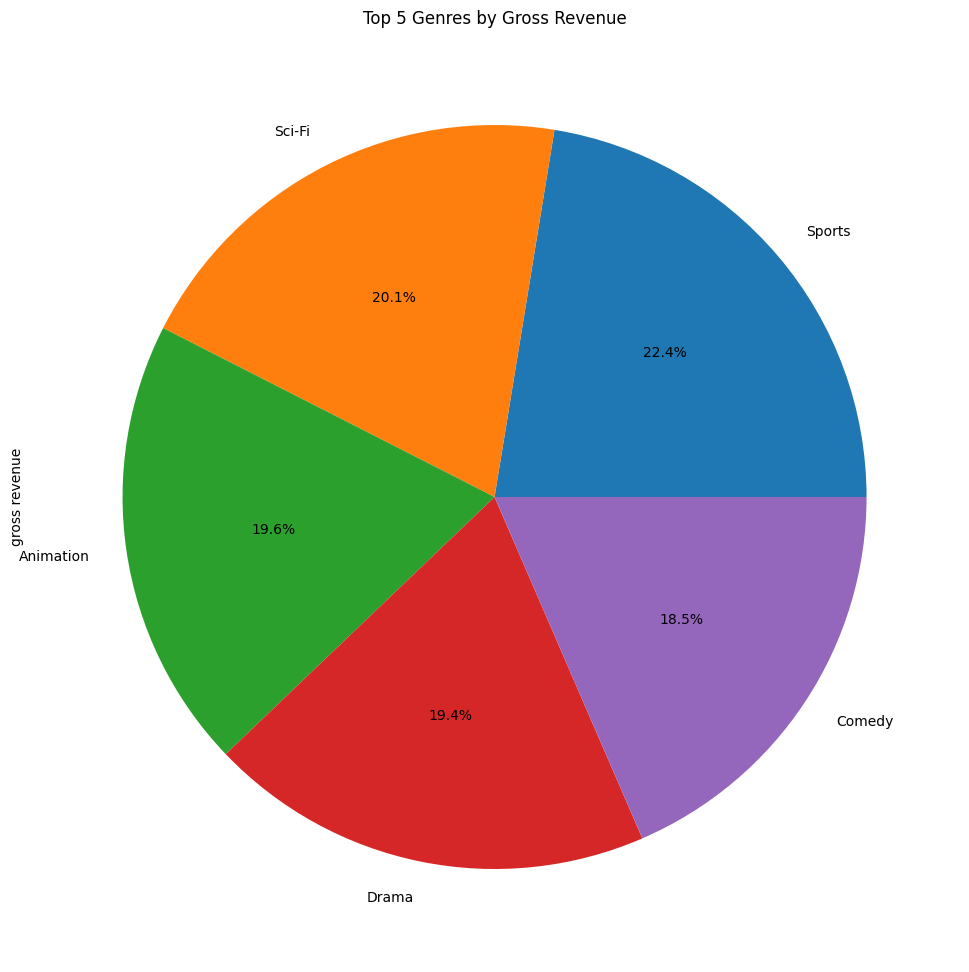

In [14]:
# Create a python function that will display a graphic the showcases the top N genres by gross revenue.
cursor.execute("SELECT category.name, SUM(amount) as gross_revenue FROM category INNER JOIN film_category ON category.category_id = film_category.category_id INNER JOIN film ON film_category.film_id = film.film_id INNER JOIN inventory ON film.film_id = inventory.film_id INNER JOIN rental ON inventory.inventory_id = rental.inventory_id INNER JOIN payment ON rental.rental_id = payment.rental_id GROUP BY category.name ORDER BY gross_revenue DESC;")
rows = cursor.fetchall()

total_gross_revenue_by_genre = pd.DataFrame(rows)
total_gross_revenue_by_genre.columns = ["genre", "gross revenue"]
total_gross_revenue_by_genre["gross revenue"] = pd.to_numeric(total_gross_revenue_by_genre["gross revenue"])
display(total_gross_revenue_by_genre)

top_5_genres_by_gross_revenue = total_gross_revenue_by_genre.head(5)

top_5_genres_by_gross_revenue.plot.pie(y="gross revenue", labels=top_5_genres_by_gross_revenue["genre"], autopct='%1.1f%%', legend=False, title="Top 5 Genres by Gross Revenue", figsize=(12, 15))

,genre,average replacement cost
0,Action,20.91
1,Animation,20.13
2,Children,20.06
3,Classics,21.01
4,Comedy,19.02
5,Documentary,19.62
6,Drama,21.09
7,Family,19.73
8,Foreign,18.65
9,Games,20.29


Text(0, 0.5, 'cost')

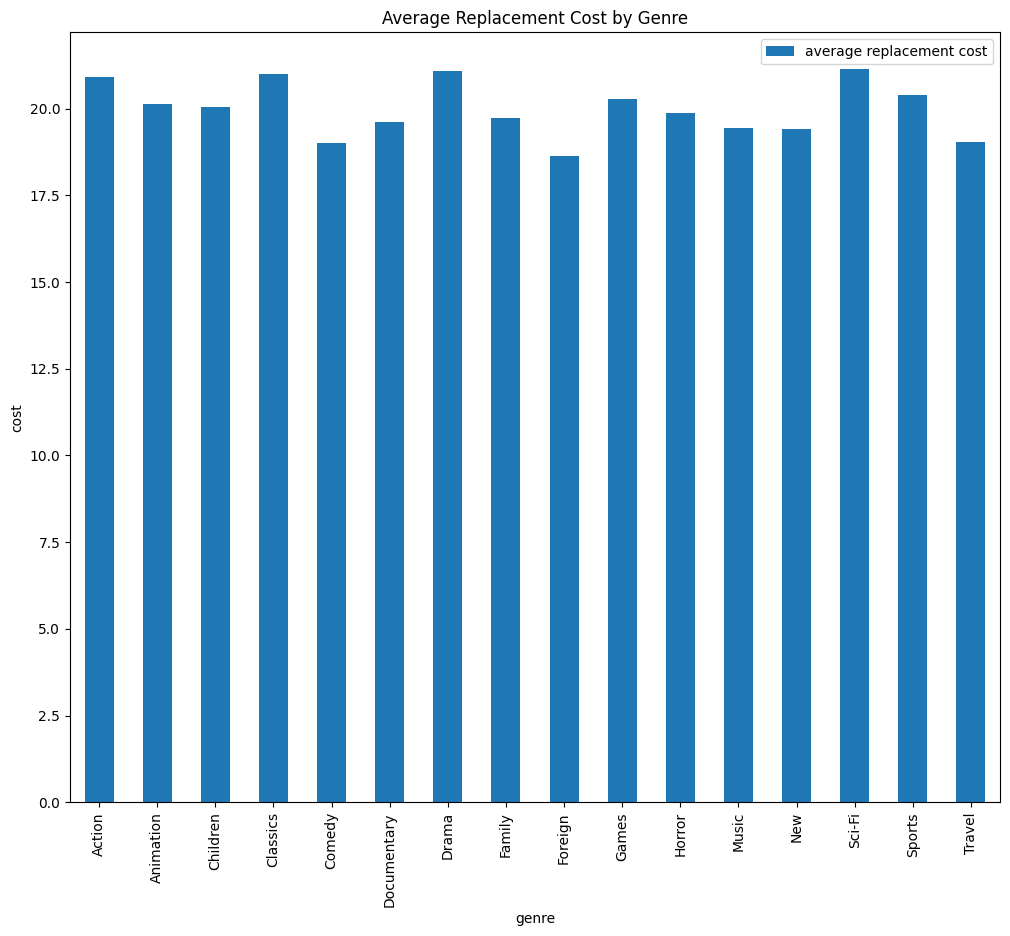

In [27]:
# Create a graphic showing the average replacement cost by category
cursor.execute("SELECT category.name, ROUND(AVG(replacement_cost), 2) AS average_replacement_cost FROM category INNER JOIN film_category ON category.category_id = film_category.category_id INNEr JOIN film ON film_category.film_id = film.film_id GROUP BY category.name ORDER BY category.name ASC;")
rows = cursor.fetchall()

avg_replacement_cost = pd.DataFrame(rows)
avg_replacement_cost.columns = ["genre", "average replacement cost"]
avg_replacement_cost["average replacement cost"] = pd.to_numeric(avg_replacement_cost["average replacement cost"])
display(avg_replacement_cost)

avg_replacement_cost.plot.bar(x="genre", y="average replacement cost", figsize=(12,10))
plt.title("Average Replacement Cost by Genre")
plt.ylabel("cost")

,rating,total films
0,G,178
1,PG,194
2,PG-13,223
3,R,195
4,NC-17,210


<Axes: title={'center': 'Total Films by Rating'}, ylabel='total films'>

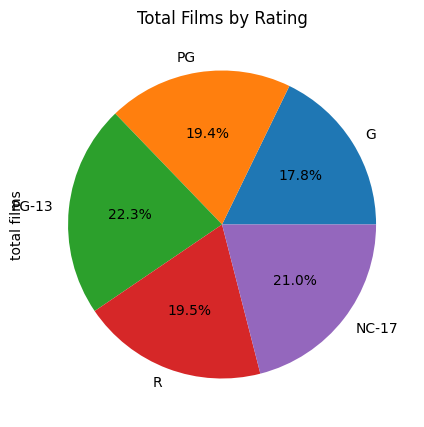

In [31]:
# Create a pie chart showing the percentage of films in each rating category (G, PG, PG-13, etc.)
cursor.execute("SELECT rating, count(*) AS total_films FROM film GROUP BY rating ORDER by rating ASC;")
rows = cursor.fetchall()

ratings = pd.DataFrame(rows)
ratings.columns = ["rating", "total films"]
ratings["total films"] = pd.to_numeric(ratings["total films"])
display(ratings)

ratings.plot.pie(y="total films", labels=ratings["rating"], autopct='%1.1f%%', legend=False, title="Total Films by Rating", figsize=(12, 5))

In [49]:
# For each category, on average how many rentals of a film need to occur to cover the replacement cost?
cursor.execute("SELECT category.name, ROUND(AVG(rental_rate), 2) AS average_rental_rate, ROUND(AVG(replacement_cost), 2) AS average_replacement_cost FROM category INNER JOIN film_category ON category.category_id = film_category.category_id INNER JOIN film ON film_category.film_id = film.film_id GROUP BY category.name ORDER BY category.name ASC;")
rows = cursor.fetchall()

rental_rate_cost = pd.DataFrame(rows)
rental_rate_cost.columns = ["category", "rental rate", "replacement cost"]
rental_rate_cost["rental rate"] = pd.to_numeric(rental_rate_cost["rental rate"])
rental_rate_cost["replacement cost"] = pd.to_numeric(rental_rate_cost["replacement cost"])
rental_rate_cost["rentals needed to cover replacement cost"] = round(rental_rate_cost["replacement cost"]/rental_rate_cost["rental rate"])
display(rental_rate_cost)

,category,rental rate,replacement cost,rentals needed to cover replacement cost
0,Action,2.65,20.91,8.0
1,Animation,2.81,20.13,7.0
2,Children,2.89,20.06,7.0
3,Classics,2.74,21.01,8.0
4,Comedy,3.16,19.02,6.0
5,Documentary,2.67,19.62,7.0
6,Drama,3.02,21.09,7.0
7,Family,2.76,19.73,7.0
8,Foreign,3.10,18.65,6.0
9,Games,3.25,20.29,6.0


# Analysis

In [18]:
# The owner of these rental stores is working on making an infographic to share with investors that will 
# showcase how each store is doing financially.  She wants you to create at least 4 graphics that she can 
# include in her presentation that will be relevant to her.  These graphics should be designed to provide a 
# clear, concise, and visually appealing overview of how the stores are doing.

In [58]:
cursor.execute("SELECT store.store_id, EXTRACT(MONTH FROM payment.payment_date) AS payment_month, SUM(payment.amount) AS total_sales FROM store INNER JOIN inventory ON store.store_id = inventory.store_id INNER JOIN rental ON inventory.film_id = rental.rental_id INNER JOIN payment ON rental.rental_id = payment.rental_id GROUP BY store.store_id, payment_month ORDER BY payment_month ASC")
rows = cursor.fetchall()

sales_by_month = pd.DataFrame(rows)
sales_by_month.columns = ["store", "month", "sales"]
sales_by_month["store"] = pd.to_numeric(sales_by_month["store"])
sales_by_month["month"] = pd.to_numeric(sales_by_month["month"])
sales_by_month["sales"] = pd.to_numeric(sales_by_month["sales"])
display(sales_by_month)

store_1 = sales_by_month[sales_by_month["store"] == 1]
store_2 = sales_by_month[sales_by_month["store"] == 2]
display(store_1)
display(store_2)

,store,month,sales
0,1,1.0,363.04
1,2,1.0,444.86
2,1,2.0,1366.87
3,2,2.0,1441.68
4,1,3.0,1705.01
5,2,3.0,1679.17
6,1,4.0,1658.15
7,2,4.0,1776.82
8,1,5.0,1572.18
9,2,5.0,1525.07


,store,month,sales
0,1,1.0,363.04
2,1,2.0,1366.87
4,1,3.0,1705.01
6,1,4.0,1658.15
8,1,5.0,1572.18
10,1,6.0,1478.39
12,1,7.0,1332.70


,store,month,sales
1,2,1.0,444.86
3,2,2.0,1441.68
5,2,3.0,1679.17
7,2,4.0,1776.82
9,2,5.0,1525.07
11,2,6.0,1600.47
13,2,7.0,1212.82


Text(0, 0.5, 'sales')

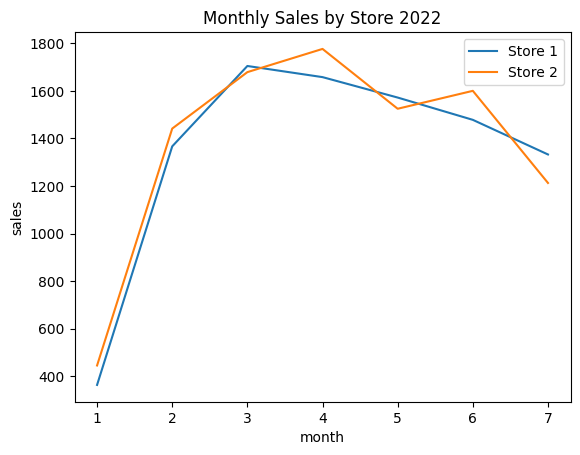

In [75]:
plt.plot(store_1["month"], store_1["sales"], label="Store 1",)
plt.plot(store_2["month"], store_2["sales"], label="Store 2",)
plt.legend()
plt.title("Monthly Sales by Store 2022")
plt.xlabel("month")
plt.ylabel("sales")
